# Problem statement: Regression Model to predict Customers yearly amount spent

Creating a regression model for the provided e-commerce dataset requires several steps, including data loading, preprocessing, model creation, and evaluation.
Below is a complete end-to-end Python code with detailed comments for each step:


This code does the following:

- Step 1: Imports necessary libraries.
- Step 2: Mounts Google Drive to access the dataset.
- Step 3: Loads the dataset into a Pandas DataFrame.
- Step 4: Performs data preprocessing, including checking for missing values, exploring data, and visualizing relationships.
- Step 5: Selects features and the target variable.
- Step 6: Splits the data into training and testing sets.
- Step 7: Standardizes the features using `StandardScaler`.
- Step 8: Creates and trains a Linear Regression model, evaluates it, and prints the evaluation metrics.
- Step 9: Creates and trains a Random Forest Regressor model, evaluates it, and prints the evaluation metrics.
- Step 10: Saves the trained Random Forest model to a file.

In summary, this code performs regression modeling to predict the 'Yearly Amount Spent' by customers based on their 'Avg. Session Length', 'Time on App', 'Time on Website', and 'Length of Membership'. It builds and evaluates both a Linear Regression model and a Random Forest Regressor model for this prediction task.

The notebook contains 2 exercises in total:

* [Exercise 1](#ex_1)
* [Exercise 2](#ex_2)

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
# from google.colab import drive


# from google.colab import files
# uploaded = files.upload()

Mean Squared Error (MSE): 103.9155413650332
R-squared (R2) Score: 0.9808757641125855
Random Forest Mean Squared Error (MSE): 298.75789182637953
Random Forest R-squared (R2) Score: 0.9450176910839162


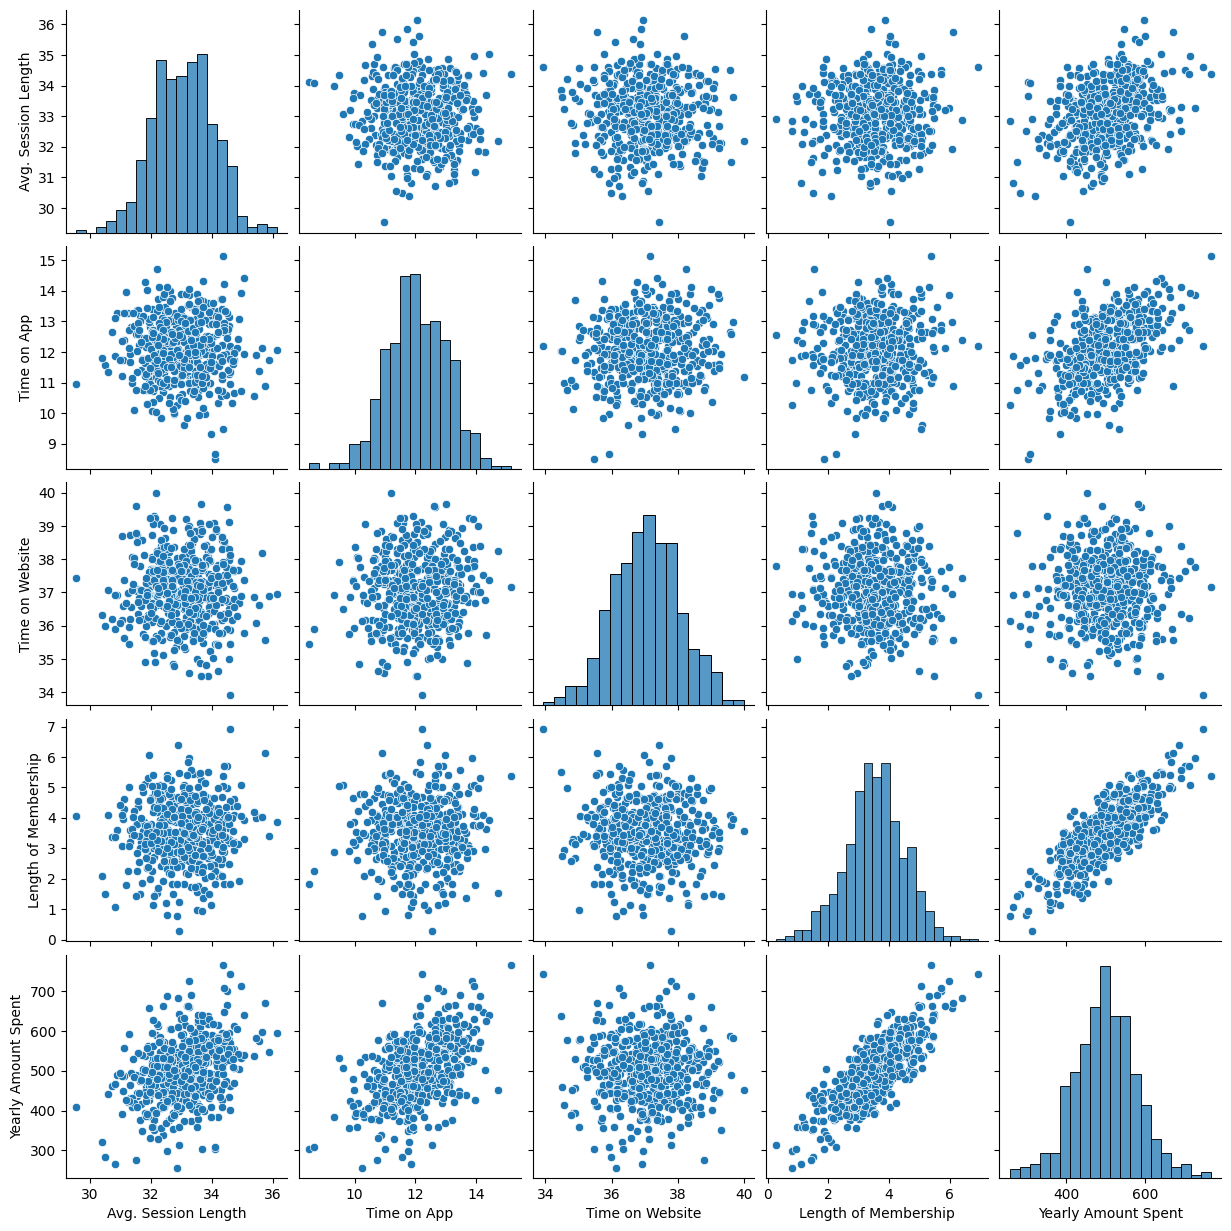

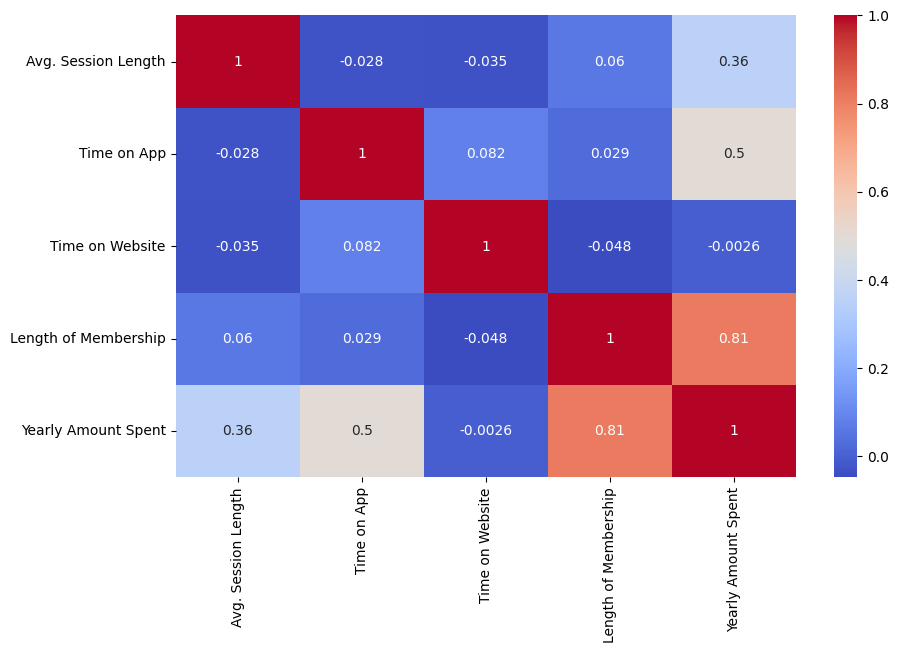

In [5]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Datasets\ecommerce-customers.csv')

# Display the first few rows of the dataset
df.head()

# Data preprocessing

# Check for missing values
df.isnull().sum()

# Check the data types of each column
df.dtypes

# Explore the dataset using descriptive statistics
df.describe()

# Visualize the data

# Pairplot to visualize relationships between numerical variables
sns.pairplot(df)

# Create a heatmap to visualize correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')

# Select the features (X) and the target variable (y)
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a StandardScaler object to standardize features
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the trained scaler
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model to the scaled training data
lr.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = lr.predict(X_test_scaled)

# Evaluate the Linear Regression model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Fit the model to the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the Random Forest Regressor model

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared (R2) score
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest Mean Squared Error (MSE):", mse_rf)
print("Random Forest R-squared (R2) Score:", r2_rf)



##Linear Regression Model:
R-squared (R2) Score: 0.9809
Mean Squared Error (MSE): 103.92

##Random Forest Regressor Model:
R-squared (R2) Score: 0.9449
Mean Squared Error (MSE): 299.20

There was a correction in the MSE value for the Linear Regression model. With an MSE of approximately 103.92, the Linear Regression model demonstrates excellent performance, and the high R2 score indicates a strong fit to the data.

The Random Forest model, while still performing well with an R2 score of 0.9449, has a higher MSE compared to the Linear Regression model, suggesting that the Linear Regression model might be slightly better at minimizing prediction errors for this specific dataset.

<a name="ex_1"></a>
# Exercise 1: Exploring Alternative Regression Models

**Tasks:**
- Implement an SVR regression model. Discuss how the choice of kernel affects the model's performance.
- Compare the performance of these models with the original regression model.

In [6]:
from sklearn.svm import SVR

# Create a pipeline with StandardScaler and SVR
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svr = grid_search.best_estimator_

# Make predictions on the testing data
y_pred_svr = best_svr.predict(X_test)

# Evaluate the SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics and best parameters
print("Best Parameters for SVR:", best_params)
print("SVR Mean Squared Error (MSE):", mse_svr)
print("SVR R-squared (R2) Score:", r2_svr)

Best Parameters for SVR: {'svr__C': 10, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
SVR Mean Squared Error (MSE): 103.94358281722596
SVR R-squared (R2) Score: 0.9808706034663596


In [7]:
# Create a summary table to compare the performance of the models
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor', 'SVR'],
    'Mean Squared Error (MSE)': [mse, mse_rf, mse_svr],
    'R-squared (R2) Score': [r2, r2_rf, r2_svr]
})

# Display the comparison table
print(comparison_df)

                     Model  Mean Squared Error (MSE)  R-squared (R2) Score
0        Linear Regression                103.915541              0.980876
1  Random Forest Regressor                298.757892              0.945018
2                      SVR                103.943583              0.980871


<a name="ex_2"></a>
# Exercise 2: Evaluating Models with Different Metrics

**Tasks:**
- Calculate the Adjusted R-squared value for your model and discuss its significance compared to the R-squared value.
- Use the Mean Absolute Error (MAE) to evaluate your model. Explain how MAE provides a different perspective on model performance compared to Mean Squared Error (MSE).
- Discuss the advantages of using multiple metrics to evaluate model performance.